<a href="https://colab.research.google.com/github/Abhijith-Nagarajan/PadhAI_Implementations/blob/main/Sigmoid_Neuron_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Sigmoid Neuron Implementation

#### Sigmoid function:

$S_{w,b}{x} = \frac{1}{1+e^{-(wx+b)}}$

Where w = weight, b = bias, x = input features

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
X = [0.5, 0.71]
Y = [0.12, 0.33]

In [3]:
w = - 0.2
b = 0.4

In [13]:
def sigmoid(w,b,X):
    return 1.0/(1.0 + np.exp(-(w*X+b)))

In [11]:
def loss(Y,Y_pred):
    return np.sum((Y-Y_pred)**2)

In [14]:
Y_pred = [sigmoid(w,b,x) for x in X]

In [15]:
print(f'Loss: {loss(np.array(Y),np.array(Y_pred))}')

Loss: 0.261341687350902


##### Plotting Sigmoid function for 100 values

In [18]:
X_array = np.linspace(-10,10,100)

In [23]:
w_new = 0.31
b_new = 0.1

In [24]:
Y_array = sigmoid(w_new,b_new,X_array)

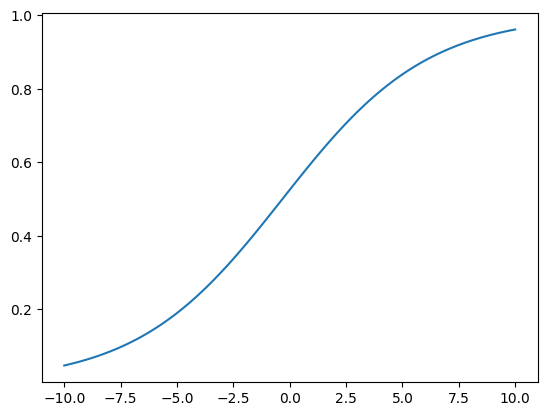

In [25]:
plt.plot(X_array,Y_array)

#### What is the significance of w and b?

##### CASE 1: On altering the sign for the weight, the direction of the curve is reversed.

In [34]:
w_new = -0.31
b_new = 0.1

In [35]:
Y_array = sigmoid(w_new,b_new,X_array)

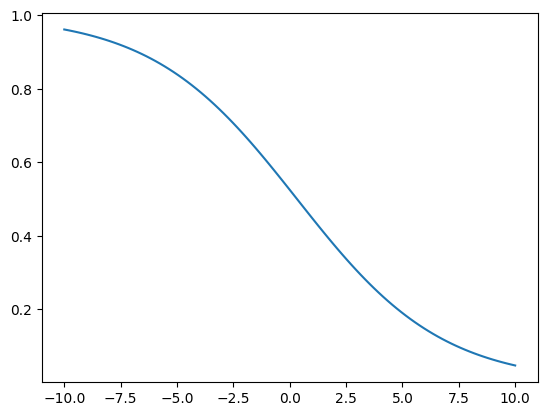

In [36]:
plt.plot(X_array,Y_array)

##### CASE 2: On increasing the magnitude for the weight, the curve gets less steep

In [37]:
w_new = 0.62
b_new = 0.1

In [38]:
Y_array = sigmoid(w_new,b_new,X_array)

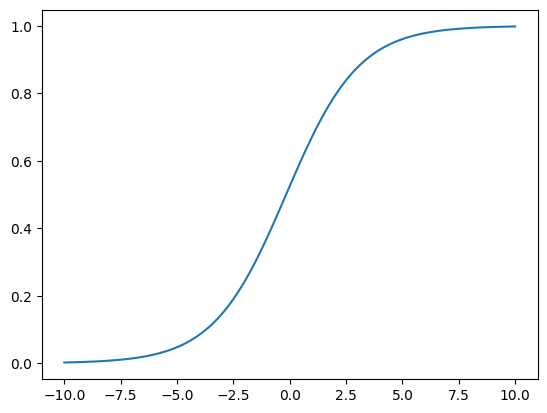

In [39]:
plt.plot(X_array,Y_array)

##### CASE 3: On altering the sign for the bias, the curve shifts towards the left [Smaller bias = Curve shifts to the left]

In [40]:
w_new = 0.31
b_new = -0.1

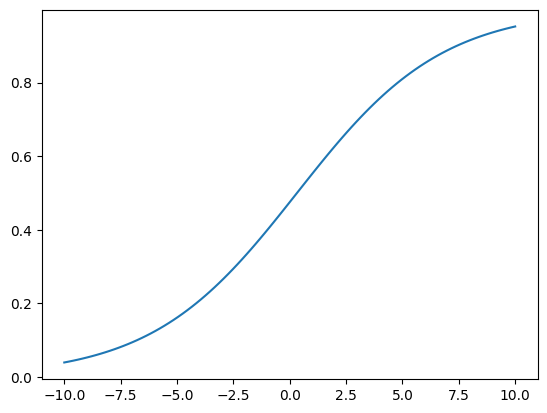

In [41]:
Y_array = sigmoid(w_new,b_new,X_array)
plt.plot(X_array,Y_array)

##### CASE 4: On increasing the magnitude, the curve shifts to the right [Larger bias = Curve shifts to the right]

In [42]:
w_new = 0.31
b_new = 0.5

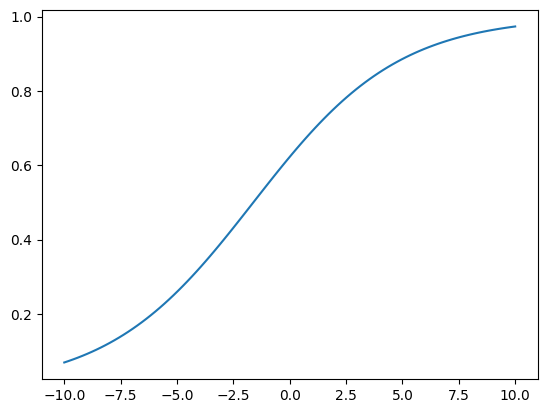

In [43]:
Y_array = sigmoid(w_new,b_new,X_array)
plt.plot(X_array,Y_array)

#### Adding Viz component to 2D sigmoid plot

In [49]:
w_slider = 2 #@param {type: "slider", min: -3, max: 3}
b_slider = 1  #@param {type: "slider", min: -3, max: 3}

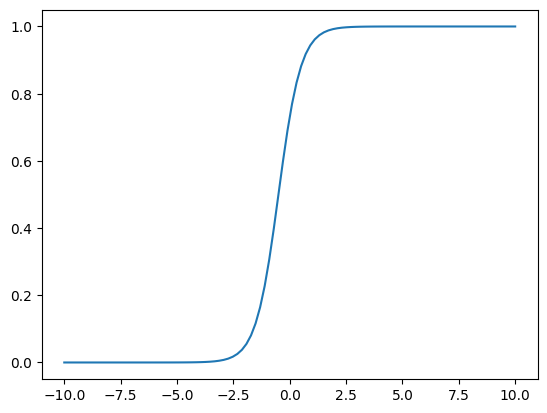

In [50]:
Y = sigmoid(w_slider,b_slider,X_array)
plt.plot(X_array,Y)